### 1st project image classification

In [ ]:
# Data: Images  

In [5]:
from bing_image_downloader import downloader

downloader.download("ice cream con", limit=30, output_dir="images", adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://graphics8.nytimes.com/images/2013/06/02/magazine/02wmt/02wmt-superJumbo-v3.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn-image.foodandwine.com/sites/default/files/1497371785/ice-cream-cones-history-FT-BLOG0617.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://shewearsmanyhats.com/wp-content/uploads/2013/07/dipped-ice-cream-cones-7.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://sugarspunrun.com/wp-content/uploads/2015/08/ice-cream-cupcakes-10.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.southernkissed.com/wp-content/uploads/2016/07/Cone-with-Ice-Cream.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://michaelstvtray.files.wordpress.com/2012/12/ice-cream-conecutout1.png
[%] File Downloaded !

[%] Downloading Image #7 from https://upload.wikimedia.org/wikipedia/commons/d/da/Strawberry_ice_cream_cone_%28

In [1]:
# Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [15]:
target=[]
images=[]
flat_data=[]

DATADIR='images'
CATEGORIES=['pretty sunflower','rugby ball','ice cream con']

for category in CATEGORIES:
     
    class_num= CATEGORIES.index(category)   # Label Encoding the Values
    path=os.path.join(DATADIR,category)    # Create path to use all the images
    
    
    for img in os.listdir(path):
        
        
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
        

In [18]:
type(images)

numpy.ndarray

In [17]:
flat_data

array([[0.02745098, 0.04313725, 0.        , ..., 0.03463965, 0.02679651,
        0.01084967],
       [0.41447059, 0.29049673, 0.07751634, ..., 0.09019608, 0.07813072,
        0.        ],
       [0.09411765, 0.22371242, 0.07058824, ..., 0.44368627, 0.56133333,
        0.38039216],
       ...,
       [0.57130719, 0.58699346, 0.62228758, ..., 0.68903242, 0.71372549,
        0.7282481 ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [29]:
# Splitting data into Training and Testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(flat_data,target, test_size=0.3,random_state=109)



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
           {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]


svc= svm.SVC(probability=True)
clf= GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [32]:
y_pred= clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2,
       0, 0, 0, 0, 1])

In [33]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [35]:
accuracy_score(y_pred,y_test)

0.8148148148148148

In [36]:
confusion_matrix(y_pred, y_test)

array([[8, 2, 2],
       [0, 9, 1],
       [0, 0, 5]], dtype=int64)

In [1]:
# Save the model using Pickle library
import pickle

# pickle.dump(clf,open('img_model.p','wb'))

In [2]:
model=pickle.load(open('img_model.p','rb'))

Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQo6uYOLhYRXrmHaJ08QHeNh-7xgj3ZTT4zzA&usqp=CAU
(168, 300, 3)


NameError: name 'CATEGORIES' is not defined

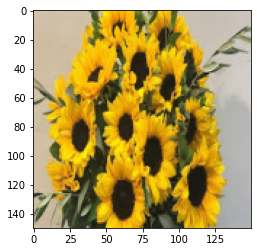

In [5]:
# Testing a brand new Image

flat_data=[]
url= input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' Predicted Output: {y_out}')


### 2nd project image classification 

In [3]:
# image Data download from bing search engine

from bing_image_downloader import downloader

# downloader.download('Bicycle',limit=50, output_dir='car_images',adult_filter_off=True)
downloader.download('Bike',limit=50, output_dir='car_images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://www.bicycleretailer.com/sites/default/files/images/article/The%20new%20SB6c%20was%20displayed%20front%20and%20center%20in%20Yeti%27s%20booth%20at%20Eurobike..jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://cdn.thecoolist.com/wp-content/uploads/2017/06/Suspension-choosing-hybrid-bike.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://roadandmountainbikereviews.co.uk/wp-content/uploads/2017/11/nebraska-1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.bicycleretailer.com/sites/default/files/images/article/Raleigh_Kodiak_PRO_iE.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://bigandtallbmx.files.wordpress.com/2018/11/shop-framed-defendant-pro-mens-bmx-bike-black-19-1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://images.singletracks.com/blog/wp-content/uploads/2017/01/BlueSquall1.jpg
[%] File Downloaded !

[%]

KeyboardInterrupt: 

In [1]:
# importing all required libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [2]:
target=[]
images=[]
flat_data=[]

DATADIR='car_images'
CATAGORIES=['Cars','Bikes','Bicycle']

for category in CATAGORIES:
    class_num= CATAGORIES.index(category)
    path= os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array= imread(os.path.join(path,img))
        img_resized = resize(img_array,(150,150,3))
        images.append(img_resized)
        flat_data.append(img_resized.flatten())
        target.append(class_num)
        
images= np.array(images)
flat_data= np.array(flat_data)
target= np.array(target)


In [3]:
# Splitting data into train and test size
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(flat_data,target, test_size=0.2, random_state=109)


In [4]:
# Hyperparameter tuning using GridSearchCV to obtain best parameter 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# param_grid=[{'C':[10,100,1000,10000],'kernel':['linear']},
#            {'C':[10,100,1000,10000],'gamma':[0.1,0.001,0.0001,0.00001],'kernel':['poly']},
#            {'C':[10,100,1000,10000],'gamma':[0.1,0.001,0.0001,0.00001],'kernel':['sigmoid']},
#            {'C':[10,100,1000,10000],'gamma':[0.1,0.001,0.0001,0.00001],'kernel':['rbf']}]

# model_svm= SVC( probability=True)

# clf_model= GridSearchCV(model_svm,param_grid)
# clf_fit= clf_model.fit(X_train, y_train)


In [5]:
clf_fit.best_params_

{'C': 100, 'gamma': 1e-05, 'kernel': 'sigmoid'}

In [5]:
model_svm= SVC(C=100, gamma=0.00001,kernel='sigmoid')
model_fit= model_svm.fit(X_train, y_train)

y_pred = model_fit.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)


0.8

Enter the urlindex.jpg
Predicted image is: Bikes


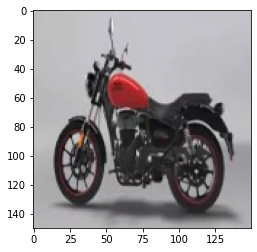

t=2020-12-25T17:41:59+0530 lvl=eror msg="failed to reconnect session" obj=csess id=5e5a63137453 err="x509: certificate is valid for tunnel.us.ngrok.com, not korgn.su.lennut.com"


In [28]:
# Now testing our model

flatdata=[]
url=input('Enter the url')
image= imread(url)
imgresized= resize(image, (150,150,3))
flatdata.append(imgresized.flatten())
flatdata=np.array(flatdata)
plt.imshow(imgresized)

y_out= model_fit.predict(flatdata)
y_out= CATAGORIES[y_out[0]]

print(f'Predicted image is: {y_out}')



In [15]:
# saving Machine Learning Model using pickle
import pickle
pickle.dump(model_fit,open('img_model.p','wb'))

In [8]:
# Deployment:
#1. WebPage - HTML/CSS/JS -Flask/Django
#2. WebApp
#3. Mobile App

In [29]:
%%writefile app.py
import streamlit as st
st.title('Image Classifier using Machine Learning model')

Overwriting app.py


t=2020-12-25T17:42:31+0530 lvl=eror msg="failed to reconnect session" obj=csess id=5e5a63137453 err="x509: certificate is valid for tunnel.us.ngrok.com, not korgn.su.lennut.com"
t=2020-12-25T17:43:01+0530 lvl=eror msg="failed to reconnect session" obj=csess id=5e5a63137453 err="resolved tunnel.us.ngrok.com has no records"


In [14]:
streamlit run app.py

SyntaxError: invalid syntax (<ipython-input-14-718866ff34b9>, line 1)

t=2020-12-25T17:00:19+0530 lvl=warn msg="failed to open private leg" id=6b11c8770bc9 privaddr=localhost:80 err="dial tcp [::1]:80: connectex: No connection could be made because the target machine actively refused it."


In [9]:
# from pyngrok import ngrok
# streamlit run app.py 
# url= ngrok.connect(port='8501')
# url

In [33]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
# Importing our ML model using pickle
model= pickle.load(open('img_model.p','rb'))

st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

uploaded_file= st.file_uploader('Choose an Image...',type='jpg')

if uploaded_file is not None:
    img= Image.open(uploaded_file)
    st.image(img, caption='Uploaded Image')
    
    if st.button('PREDICT'):
        CATAGORIES=['Cars', 'Bikes', 'Bicycle']
        st.write('Result...')
        flat_data=[]
        img= np.array(img)
        img_resized= resize(img,(150,150,3))
        flat_data.append(img_resized.flatten())
        flat_data= np.array(flat_data)
        y_out= model.predict(flat_data)
        y_out= CATAGORIES[y_out[0]]
        st.write(f'PREDICTED OUTPUT: {y_out}')
        

Overwriting app.py


t=2020-12-25T17:46:33+0530 lvl=eror msg="failed to reconnect session" obj=csess id=5e5a63137453 err="dial tcp 3.20.27.198:443: i/o timeout"
t=2020-12-25T17:46:47+0530 lvl=eror msg="failed to reconnect session" obj=csess id=5e5a63137453 err="Get https://dns.google.com/resolve?cd=true&name=tunnel.us.ngrok.com&type=A: net/http: request canceled while waiting for connection (Client.Timeout exceeded while awaiting headers)"
t=2020-12-25T17:47:02+0530 lvl=eror msg="failed to reconnect session" obj=csess id=5e5a63137453 err="Get https://s3.amazonaws.com/dns.ngrok.com/tunnel.json: context deadline exceeded"
t=2020-12-25T17:47:09+0530 lvl=eror msg="failed to reconnect session" obj=csess id=5e5a63137453 err="resolved tunnel.us.ngrok.com has no records"
t=2020-12-25T17:47:32+0530 lvl=eror msg="failed to reconnect session" obj=csess id=5e5a63137453 err="dial tcp: i/o timeout"
t=2020-12-25T17:48:01+0530 lvl=eror msg="failed to reconnect session" obj=csess id=5e5a63137453 err="read tcp 192.168.43.42